Implement differentiation techniques

In [3]:
function forward_diff(f, x, h)
    return (f(x + h) - f(x)) / h
end

forward_diff (generic function with 1 method)

In [4]:
function backward_diff(f, x, h)
    return(f(x) - f(x - h)) / h
end

backward_diff (generic function with 1 method)

In [5]:
function sym_diff(f, x, h)
    return(f(x + h) - f(x - h)) / 2 / h
end

sym_diff (generic function with 1 method)

Find the best $h$ value, from each technique.

In [6]:
f(x) = exp(x)  # e^x
df(x) = exp(x)  # d/dx e^x = e^x

err_forward = []
err_backward = []
err_sym = []
exact = df(0)
for i in 1:20
    h = 1 / (10^i)
    forward = forward_diff(f, 0, h)
    backward = backward_diff(f, 0, h)
    sym = sym_diff(f, 0, h)
    push!(err_forward, abs(forward - exact) / abs(exact))
    push!(err_backward, abs(backward - exact) / abs(exact))
    push!(err_sym, abs(sym - exact) / abs(exact))
end

Test

In [7]:
using Plots

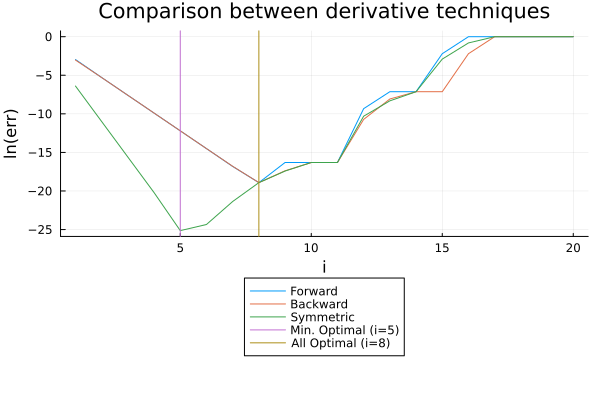

In [25]:
plot(
    1:20,
    log.(err_forward),
    xlabel="i",
    ylabel="ln(err)",
    label="Forward",
    title="Comparison between derivative techniques",
    legend=:outerbottom,
)
plot!(1:20, log.(err_backward), label="Backward")
plot!(1:20, log.(err_sym), label="Symmetric")
vline!([5], label="Min. Optimal (i=5)")
vline!([8], label="All Optimal (i=8)")

1. วิธี forward และ backward ให้ความแม่นยำเทียบเท่ากันหรือไม่ ?

$\Rightarrow$ อาจใช่ จะเห็นว่าในช่วง $i \in [0, 8]$ เส้นค่อนข้างทับกัน แต่หลังจาก $i > 8$ เป็นต้นไปเส้น Forward ให้ error ที่สูงกว่า (เข้าใกล้ 0 มากกว่า)

2. วิธี symmetric ให้ความแม่นยำเทียบเท่ากับ forward และ backward หรือไม่ ?

$\Rightarrow$ ไม่ เพราะ symmetric ให้ error ที่ต่ำกว่าอย่างชัดเจนที่ $i = 5$

3. ค่า $h$ ที่ดีที่สุดสำหรับ forward และ backward คือเท่าไหร่

$\Rightarrow$ จากกราฟ คือ $i = 8 \rightarrow h = 10^{-8}$

4. ค่า $h$ ที่ดีที่สุดสำหรับ symmetric คือเท่าไหร่

$\Rightarrow$ จากกราฟ คือ $i = 5 \rightarrow h = 10^{-5}$